In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed = 42

from sklearn.model_selection import train_test_split

# Location Intelligence Data Clustering

### Problem statement

### Data description

| Column Name           | Description                                      |
|:----------------------|:-------------------------------------------------|
| business_id           | A unique Google Places identifier for each business, ensuring distinct entries |
| phone_number          | The contact number associated with the business|
| name                  | The official name of the business as listed on Google Maps |
| full_address          | The complete postal address of the business, including locality and geographic details |
| latitude              | The geographic latitude coordinate of the business location |
| longitude             | The geographic longitude coordinate of the business location |
| review_count          | The total number of reviews the business has received on Google Maps |
| rating                | The average user rating out of 5 for the business |
| timezone              | The world timezone the business is located in |
| website               | The official website URL of the business
| place_id              | A unique Google Place ID
| place_link            | A link to the business on Google Maps
| Friday                | The opening hours on Friday
| Saturday              | The opening hours on Saturday
| Sunday                | The opening hours on Sunday
| Monday                | The opening hours on Monday
| Tuesday               | The opening hours on Tuesday
| Wednesday             | The opening hours on Wednesday
| Thursday              | The opening hours on Thursday
| city                  | The city where the business is located
| state                 | The current status - Open / Closed and when that will change
| types                 | The category or type of service the business provides, such as restaurant, museum, etc. |
| verified              | Indicates whether the business listing has been claimed by the owner on Google Maps |
| Monday_morning        | Indicates if the business is operational Monday morning |
| Monday_afternoon      | Indicates if the business is operational Monday afternoon |
| Monday_evening        | Indicates if the business is operational Monday evening |
| Tuesday_morning       | Indicates if the business is operational Tuesday morning |
| Tuesday_afternoon     | Indicates if the business is operational Tuesday afternoon |
| Tuesday_evening       | Indicates if the business is operational Tuesday evening |
| Wednesday_morning     | Indicates if the business is operational Wednesday morning |
| Wednesday_afternoon   | Indicates if the business is operational Wednesday afternoon |
| Wednesday_evening     | Indicates if the business is operational Wednesday evening 
| Thursday_morning      | Indicates if the business is operational Thursday morning 
| Thursday_afternoon    | Indicates if the business is operational Thursday afternoon 
| Thursday_evening      | Indicates if the business is operational Thursday evening 
| Friday_morning        | Indicates if the business is operational Friday morning 
| Friday_afternoon      | Indicates if the business is operational Friday afternoon 
| Friday_evening        | Indicates if the business is operational Friday evening 
| Saturday_morning      | Indicates if the business is operational Saturday morning 
| Saturday_afternoon    | Indicates if the business is operational Saturday afternoon
| Saturday_evening      | Indicates if the business is operational Saturday evening
| Sunday_morning        | Indicates if the business is operational Sunday morning
| Sunday_afternoon      | Indicates if the business is operational Sunday afternoon
| Sunday_evening        | Indicates if the business is operational Sunday evening
| geo_cluster           | A clustering identifier used to group similar businesses based on geographic or other clustering algorithms
| country               | The country where the business is located

In [221]:
### chyba powinnyśmy usunąć geo_cluster

### EDA

In [222]:
df = pd.read_csv('./DATA/google_places_data.csv')

In [223]:
df.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom


In [224]:
df.shape

(15203, 46)

In [225]:
df.describe()

,latitude,longitude,review_count,rating,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,...,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster
count,15198.000000,15198.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,...,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15198.000000
mean,33.180311,24.517834,709.113136,4.287417,0.106624,0.106624,0.106624,0.108860,0.108860,0.108860,...,0.108794,0.108794,0.108794,0.108926,0.108926,0.108926,0.108860,0.108860,0.108860,0.698316
std,12.249122,50.581680,5657.130516,0.669842,0.308644,0.308644,0.308644,0.311474,0.311474,0.311474,...,0.311391,0.311391,0.311391,0.311556,0.311556,0.311556,0.311474,0.311474,0.311474,0.980758
min,-45.577163,-157.870613,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.260005,5.276266,8.000000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.311978,55.284218,32.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.291451,55.370963,114.000000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,70.032732,176.230310,256877.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

Conclusion: The set contains 5 missing values in columns latitude and longitude

Rows with missing values:

In [227]:
df[df.isnull().any(axis=1)]

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
5355,0x80dd4a6f6bc3c0d1:0xa0dbcc9e52e67a7d,13105300994,"R Painting,License #752512",Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
5368,0x549175bad87e4499:0xe474185a7c812203,13608880460,IJB Painting Company,Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
7683,0x3e5f43a21c43cf97:0x5ab0bd09eee41976,971524175130,S&Y Travel Agency,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
8571,0xb2afb323ceda5e5:0x9616560c124aa170,971509014567,Luxury District Real Estate,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,NaN,United Arab Emirates
12398,0x886b5c66fee9323d:0x3aa2c26684beba68,18137481822,Election Roofing and Construction LLC,Unknown,NaN,NaN,1.0,4.0,America/New_York,https://election-roofing-and-construction-llc....,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates


There are only 5 rows with missing values, they make only 0.03% of the dataframe, so we can delete them

In [228]:
df = df.dropna(how='any').reset_index(drop = True)

In [268]:
df

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15193,0x3e5f59c4dab7eff3:0x89fae07c807d4c5f,Unknown,Safari Rent A Car,9CVM+833 Safari Rent A Car - Al Rashidiya 3 - ...,25.393262,55.432665,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15194,0x3e5f595110611ba5:0xb6cd7ca953dec16,Unknown,IQRA CARS SPARE PARTS,IQRA CARS SPARE PARTS - Shop #01 - Ajman Indus...,25.377181,55.464124,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15195,0x3e5f584795807779:0x649b125cfbb4af24,97167406863,London Rent A Car,9FQ5+RWM London Rent A Car - Al Rashidiya 1 - ...,25.389579,55.459804,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15196,0x3e5f61040c475cd7:0xb9e710d1665cd4ff,Unknown,Akbar family guest house,Akbar family guest house - Morocco G2 - Intern...,25.163250,55.418791,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates


In [229]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
business_id,15103
phone_number,11277
name,14187
full_address,14737
latitude,14418
longitude,14422
review_count,1819
rating,40
timezone,112
website,7529


The business_id column according to the dataset description is a unique identifier, however there is only 15103 unique values in 15198 total values.

In [270]:
a = df.groupby('business_id', as_index = False).count()
c = a[a['name'] >1]['business_id'].values
b = df[df['business_id'].isin(c)].sort_values(by='business_id').reset_index(drop = True)
b[['types']]

,types
0,"Shoe store, Barber shop, Cafe"
1,"Cafe, Barber shop, Shoe store"
2,"Plumber, Air conditioning contractor, Air cond..."
3,"Painter, Air conditioning contractor, Air cond..."
4,"Convenience store, ATM, Auto electrical servic..."
...,...
185,"Bank, ATM"
186,"ATM, Bank"
187,"Bank, ATM"
188,"Bank, ATM"


Rows with identical business_id are the same, except for types column, but the difference is order in the types list, so we can delete the duplicates

In [278]:
df = df.drop_duplicates(subset=['business_id'])
df

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15193,0x3e5f59c4dab7eff3:0x89fae07c807d4c5f,Unknown,Safari Rent A Car,9CVM+833 Safari Rent A Car - Al Rashidiya 3 - ...,25.393262,55.432665,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15194,0x3e5f595110611ba5:0xb6cd7ca953dec16,Unknown,IQRA CARS SPARE PARTS,IQRA CARS SPARE PARTS - Shop #01 - Ajman Indus...,25.377181,55.464124,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15195,0x3e5f584795807779:0x649b125cfbb4af24,97167406863,London Rent A Car,9FQ5+RWM London Rent A Car - Al Rashidiya 1 - ...,25.389579,55.459804,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15196,0x3e5f61040c475cd7:0xb9e710d1665cd4ff,Unknown,Akbar family guest house,Akbar family guest house - Morocco G2 - Intern...,25.163250,55.418791,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates


In [279]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
business_id,15103
phone_number,11277
name,14187
full_address,14737
latitude,14418
longitude,14422
review_count,1817
rating,40
timezone,112
website,7529


Conclusion: Almost half of the columns has binary values (0 or 1).

### Train, Validation and Test Sets

In [280]:
X_dev, X_test = train_test_split(df, test_size=0.3, random_state=42)
df = X_dev

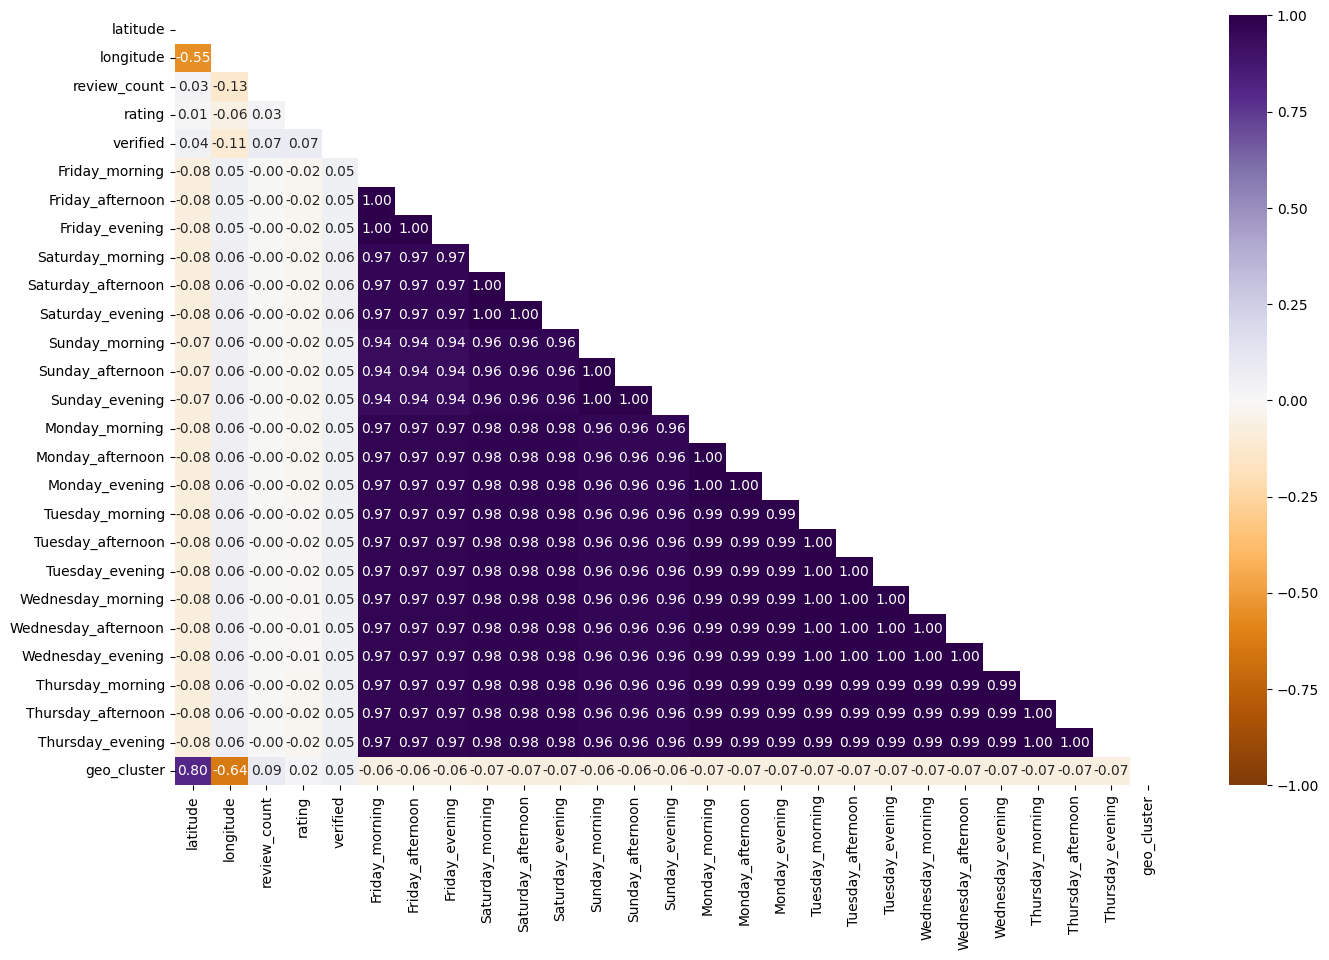

In [281]:
num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(df[name])]
plt.figure(figsize=(16, 10))
mask = np.triu(df[num_features].corr())
labels = df[num_features].corr().map(lambda v: v if v else '')
heatmap = sns.heatmap(df[num_features].corr(), annot=labels, fmt=".2f", vmin=-1, vmax=1, cmap="PuOr", mask=mask)
plt.show()

Conclusions: 

The most correlated variables in the dataset are:

* binary variables indicating if the business is operational on different times of the day on different day of the week: > 0.9


#### Split into binary and numerical columns

In [282]:
bool_columns = ['Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening', 'verified']
df['verified'] = df['verified'].astype("float64")
df_bool = df[bool_columns].reset_index(drop = True)
df_bool.head()

,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening,Monday_morning,...,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,verified
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1.0


In [283]:
numeric_columns = ['latitude',
       'longitude', 'review_count', 'rating', 'geo_cluster']
df_num = df[numeric_columns].reset_index(drop = True)
df_num.head()

,latitude,longitude,review_count,rating,geo_cluster
0,49.989875,4.699309,606.0,4.6,2.0
1,39.929497,-87.072467,1727.0,4.8,1.0
2,25.364165,55.406443,98.0,3.3,0.0
3,35.910258,14.506284,3.0,2.3,2.0
4,25.118919,55.201020,28.0,3.5,0.0


#### Analysis of Binary Columns

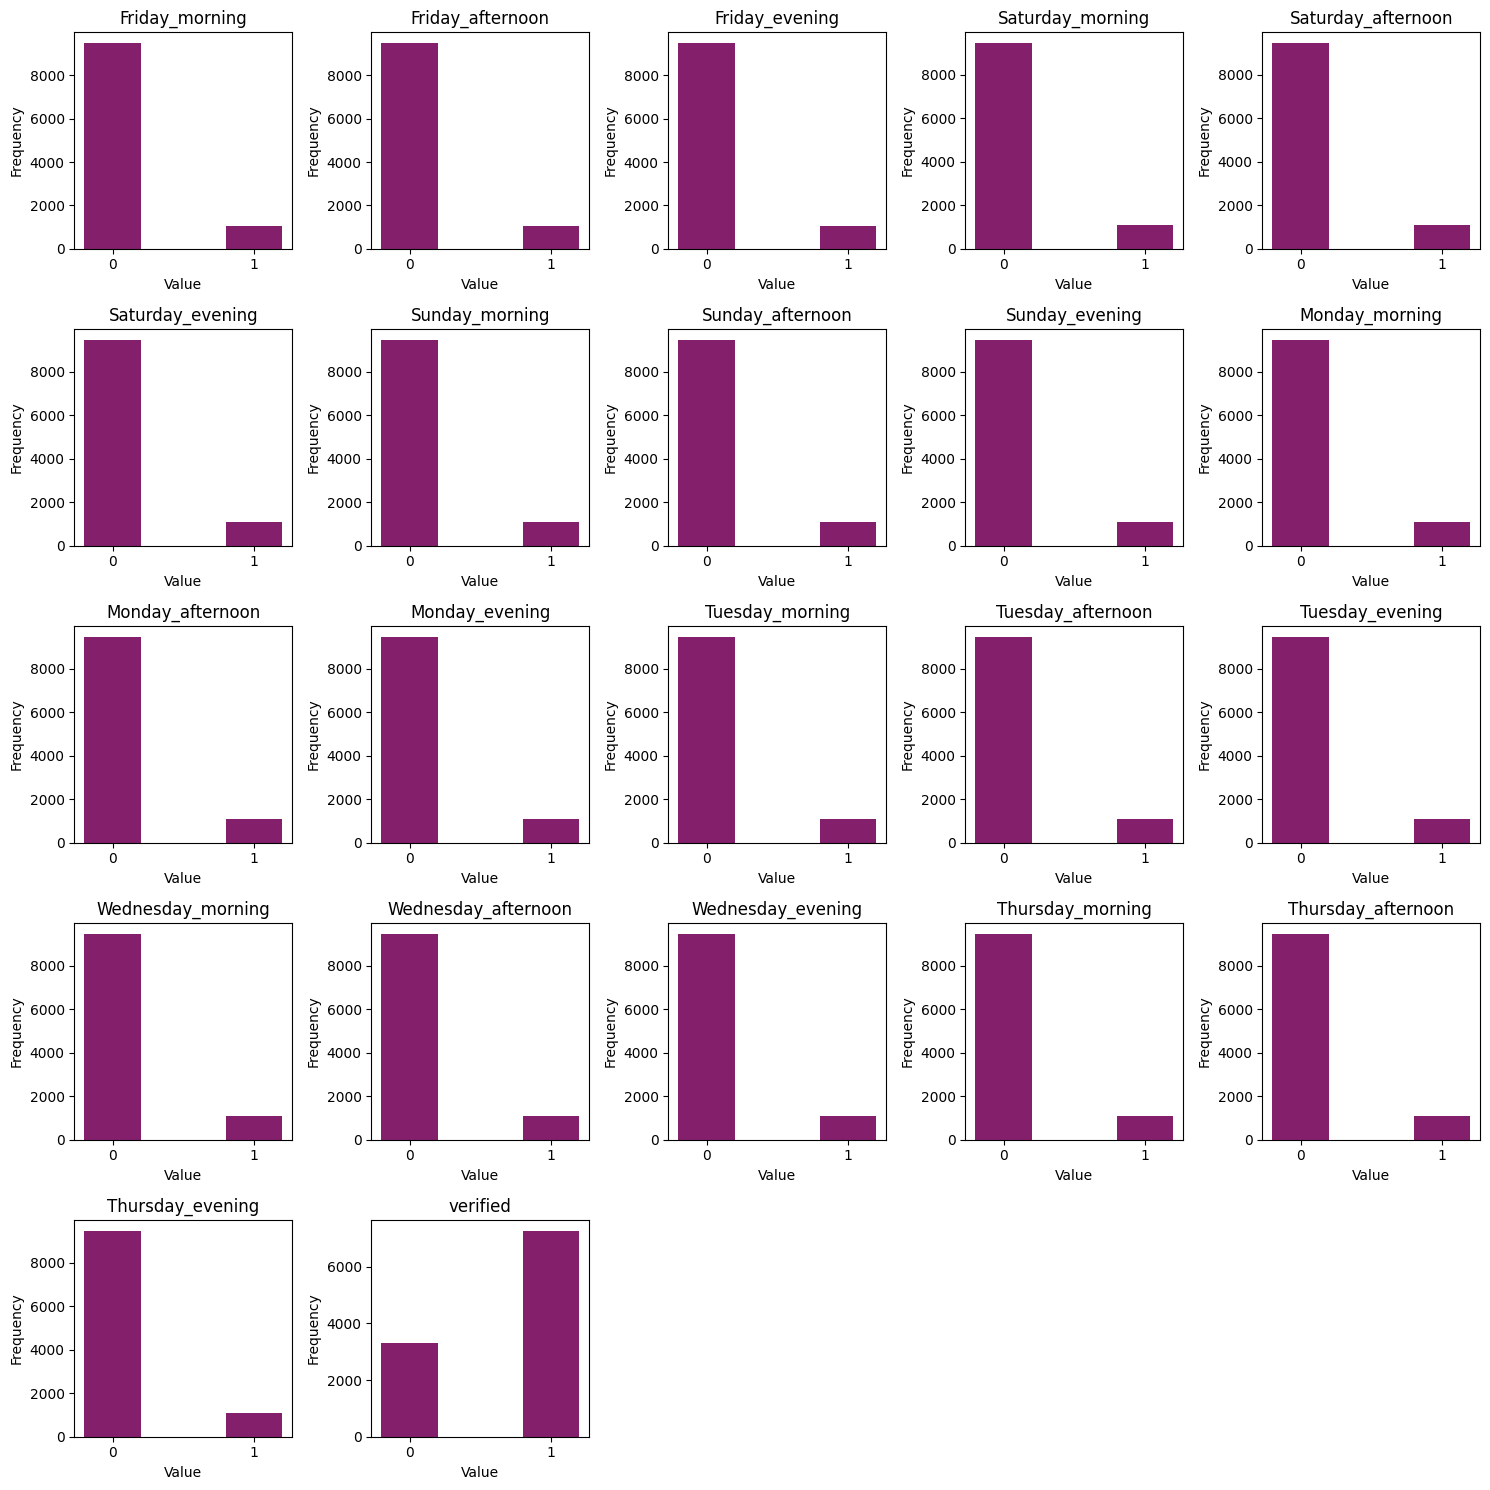

In [284]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(df_bool.columns):
    plt.subplot(5, 5, i + 1)
    plt.hist(df_bool[col], bins=[-0.25, 0.25, 0.75, 1.25], align='mid', color = '#84206b', rwidth=0.8)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])  
plt.tight_layout()
plt.show()


Conclusion: binary variables indicating if the business is operational on different times of the day on different day of the week have very similar value distribution

#### Analysis of Numerical Columns

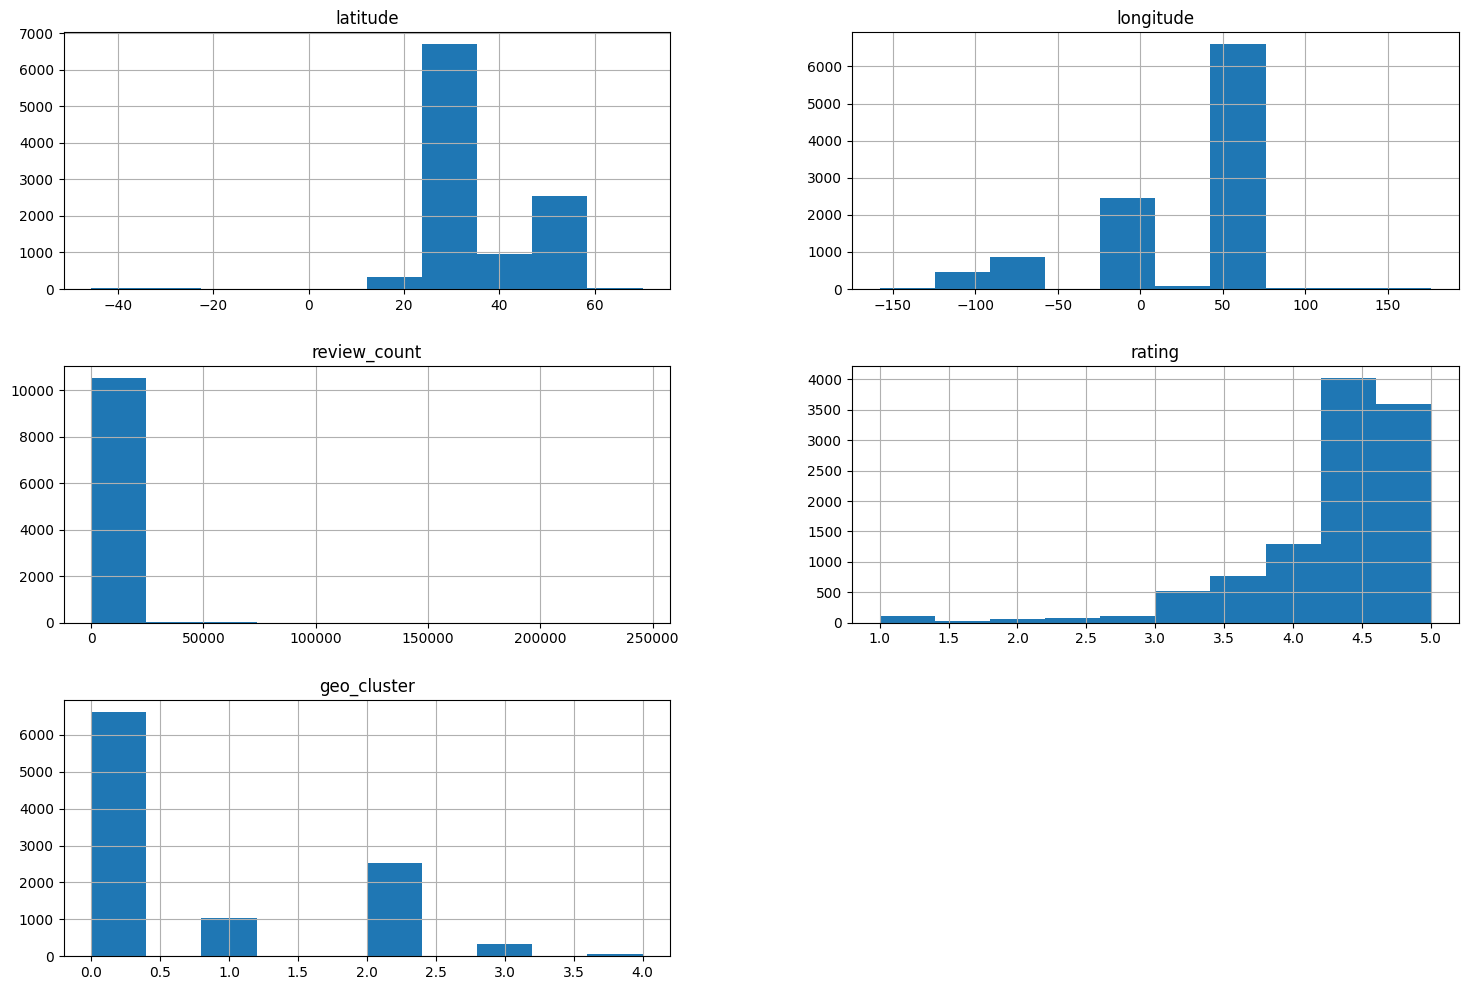

In [285]:
df_num.hist(bins = 10, figsize=(18, 12))
plt.show()

In [286]:
print('Train + Val: ', X_dev.shape)
print('Test: ', X_test.shape)

Train + Val:  (10572, 46)
Test:  (4531, 46)


In [287]:
# X_dev.to_csv('X_dev.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)

### Preprocessing

##### Outliers

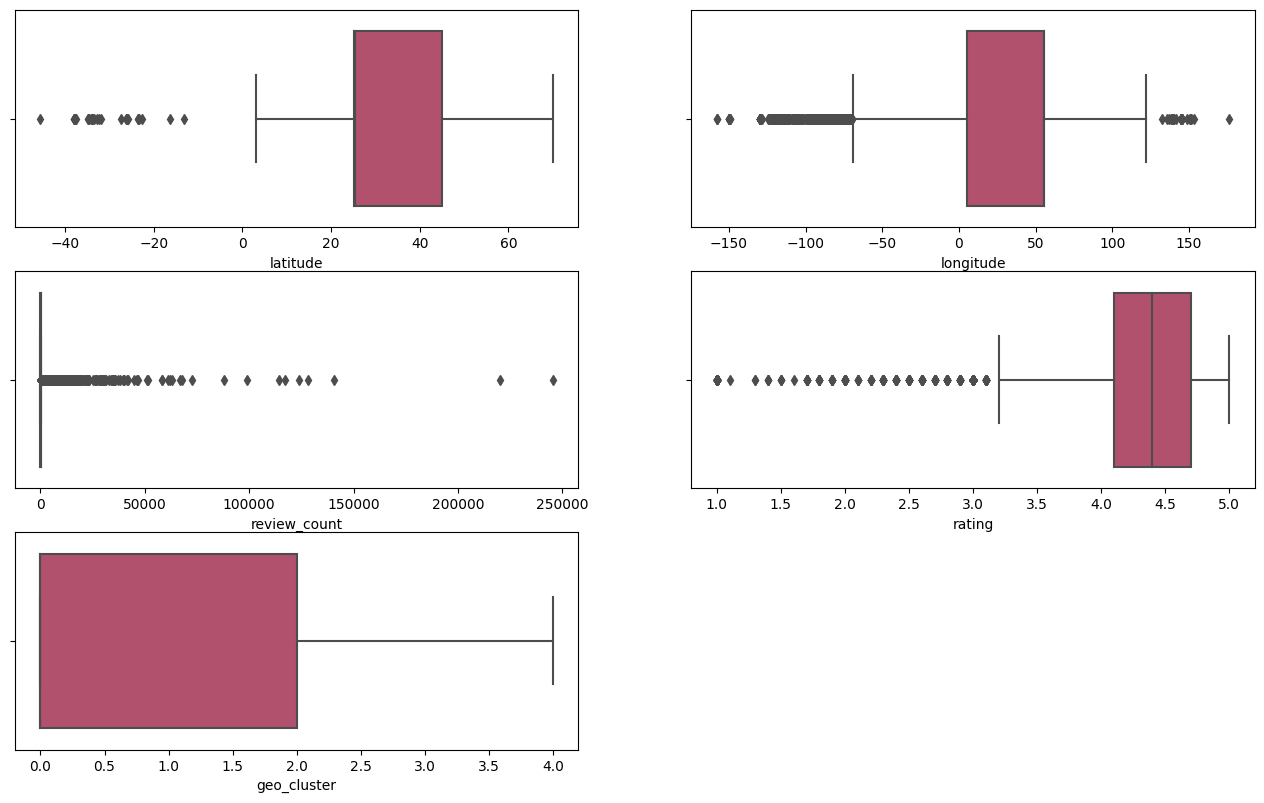

In [288]:
plt.figure(figsize = (16,13))

for i, col in enumerate(df_num.columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df_num, palette='flare')
plt.show()

### Cutting off review_count

C:\Users\okroj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


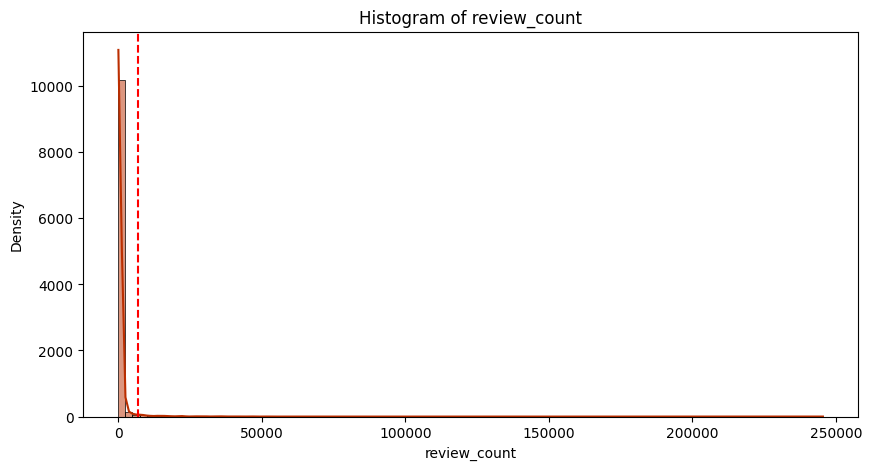

Value above which highest 2% of the data falls: 6864.039999999997


In [289]:
plt.figure(figsize=(10, 5))
sns.histplot(df['review_count'], bins=100, kde=True, color='#bb2e00', edgecolor='black')

highest_2_percent = df['review_count'].quantile(0.98)
plt.axvline(x=highest_2_percent, color='red', linestyle='--')
plt.title('Histogram of review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.show()
print("Value above which highest 2% of the data falls:", highest_2_percent)

In [290]:
df.loc[df['review_count'] > highest_2_percent, 'review_count'] = highest_2_percent

C:\Users\okroj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


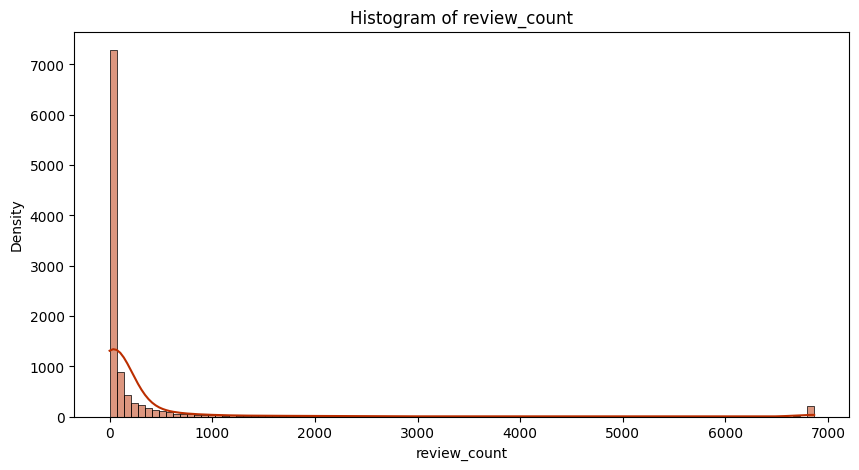

In [291]:
plt.figure(figsize=(10, 5))
sns.histplot(df['review_count'], bins=100, kde=True, color='#bb2e00', edgecolor='black')
plt.title('Histogram of review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.show()

### Cutting off rating

C:\Users\okroj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


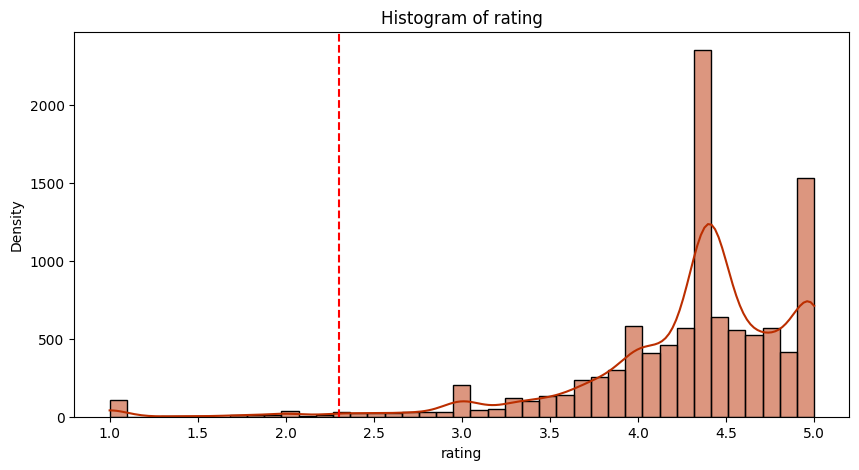

Value above which lowest 2% of the data falls: 2.3


In [292]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=41, kde=True, color='#bb2e00', edgecolor='black')

lowest_2_percent = df['rating'].quantile(0.02)
plt.axvline(x=lowest_2_percent, color='red', linestyle='--')
plt.title('Histogram of rating')
plt.xlabel('rating')
plt.ylabel('Density')
plt.show()
print("Value above which lowest 2% of the data falls:", lowest_2_percent)

In [293]:
df.loc[df['rating'] < lowest_2_percent, 'rating'] = lowest_2_percent

C:\Users\okroj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


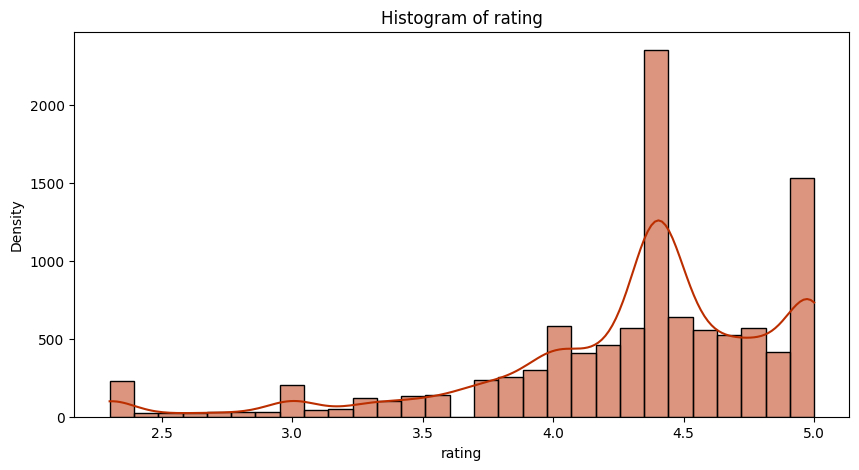

In [294]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=29, kde=True, color='#bb2e00', edgecolor='black')
plt.title('Histogram of rating')
plt.xlabel('rating')
plt.ylabel('Density')
plt.show()